In [22]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [23]:
discard_df = pd.read_csv("../csv/datasets/complete_discard.csv")
average_df = pd.read_csv("../csv/datasets/complete_avg.csv")
predict_df = pd.read_csv("../csv/datasets/complete_pred.csv")

# Random Forest Regression

In [24]:
def rfr(df, n_splits):
    tscv = TimeSeriesSplit(n_splits)

    model = RandomForestRegressor(random_state=42)

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)
    return sum(avg_score) / len(avg_score)


In [60]:
rfr_split_test = {}
for n in range(2, 21):
    print(n)
    avg1 = rfr(discard_df, n)
    avg2 = rfr(predict_df, n)
    avg3 = rfr(average_df, n)
    rfr_split_test[str(n)] = (avg1 + avg2 + avg3) / 3


2
3
4
5
6
7
8
9


KeyboardInterrupt: 

In [21]:
print(rfr_split_test)

{'2': 0.578126471920388, '3': 0.6484014248413773, '4': 0.7283821173882454, '5': 0.6826728882329715, '6': 0.719407212494452, '7': 0.7601387435340914, '8': 0.6900027002039644, '9': 0.7873922676124545, '10': 0.7700774039778545, '11': 0.7425826319705464, '12': 0.799667461563672, '13': 0.775234263071609, '14': 0.7575244059228997, '15': 0.6520810521934656, '16': 0.8072842710889779, '17': 0.7956217210466384, '18': 0.8119940189644941, '19': 0.7975710936940923, '20': 0.7498346738739861}


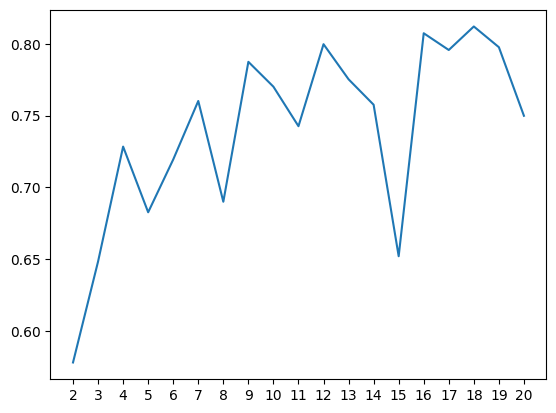

In [59]:
import matplotlib.pylab as plt

lists = (rfr_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [20]:
splits = 12

print(rfr(discard_df, splits))

print(rfr(average_df, splits))

print(rfr(predict_df, splits))

0.799667461563672
0.8011692623053106
0.7933930177913372


# Linear Regression

In [31]:
def lin_reg(df, n_splits):
    tscv = TimeSeriesSplit(n_splits)

    model = LinearRegression()

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)

    return sum(avg_score) / len(avg_score)

In [53]:
linreg_split_test = {}
for n in range(2, 101):
    print(n)
    avg1 = lin_reg(discard_df, n)
    avg2 = lin_reg(average_df, n)
    avg3 = lin_reg(predict_df, n)
    #print(avg)
    linreg_split_test[str(n)] = (avg1 + avg2 + avg3) / 3

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [54]:
print(linreg_split_test)
print(max(linreg_split_test, key=linreg_split_test.get))


{'2': 0.6176455619066915, '3': 0.659090335105302, '4': 0.6811735635650221, '5': 0.7165679195241594, '6': 0.731234157107283, '7': 0.7228230168625488, '8': 0.7359166037162147, '9': 0.7446200735035652, '10': 0.7453049253304478, '11': 0.7581903343490378, '12': 0.7625082112208211, '13': 0.7562156871213016, '14': 0.7566031169643134, '15': 0.7543559377421266, '16': 0.7670385773773044, '17': 0.7629220855439914, '18': 0.7719890232228228, '19': 0.7658520721599414, '20': 0.7711294294554015, '21': 0.7765668056552203, '22': 0.7765322895385639, '23': 0.7818148146865981, '24': 0.7799414995270703, '25': 0.7853990902725544, '26': 0.7822915630715214, '27': 0.7833040994139848, '28': 0.7852455930003789, '29': 0.788091541453702, '30': 0.7872631938446361, '31': 0.7903138369658019, '32': 0.788642178384981, '33': 0.7910060640151476, '34': 0.7899648809635776, '35': 0.7937212720246755, '36': 0.792805298261217, '37': 0.7932045423594322, '38': 0.7937970368420952, '39': 0.7985798701783708, '40': 0.7945495663895826

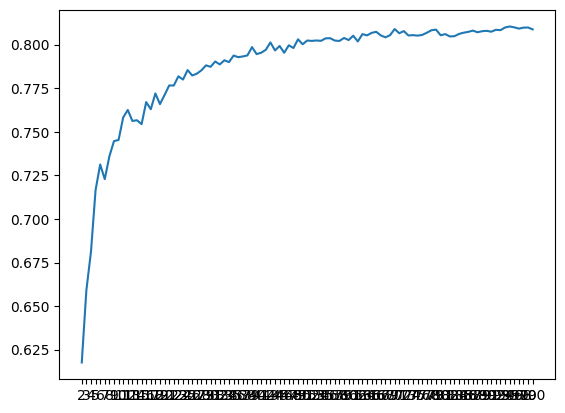

In [58]:
import matplotlib.pylab as plt

lists = (linreg_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [55]:
splits = 95

print(lin_reg(discard_df, splits))

print(lin_reg(average_df, splits))

print(lin_reg(predict_df, splits))

0.80773192160643
0.8133981645820128
0.8100811013269121


# XGBoost Regressor

In [61]:
def xgb_reg(df, n_splits):
    tscv = TimeSeriesSplit(n_splits)

    model = XGBRegressor(random_state=42)

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)

    return sum(avg_score) / len(avg_score)

In [ ]:
xgb_split_test = {}
for n in range(2, 101):
    print(n)
    avg1 = xgb_reg(discard_df, n)
    avg2 = xgb_reg(average_df, n)
    avg3 = xgb_reg(predict_df, n)
    #print(avg)
    linreg_split_test[str(n)] = (avg1 + avg2 + avg3) / 3

In [ ]:
print(xgb_split_test)
print(max(xgb_split_test, key=xgb_split_test.get))

In [ ]:
import matplotlib.pylab as plt

lists = (xgb_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [62]:
splits = 12

xgb_reg(discard_df, splits)

xgb_reg(average_df, splits)

xgb_reg(predict_df, splits)

Avg Score: 0.8043508460254354
Avg Score: 0.7885673679237818
Avg Score: 0.7761244731651772
